<a href="https://colab.research.google.com/github/vp79247/VivekProjects/blob/master/forecast_hourly_bike_rental_demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplolib inline

UsageError: Line magic function `%matplolib` not found.


In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

# DATA EXPLORATION

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [ ]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7


In [ ]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
dtype: int64

No missing value in train and test data

In [ ]:
test.shape

(4399, 11)

In [ ]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [ ]:
test.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
dtype: object

#We can infer from the data that count is the dependent variable and all the data except 'datetime' is numeric

# UNIVARIATE ANALYSIS

In [ ]:
import seaborn as sn
%matplotlib inline

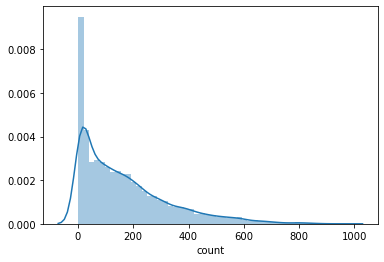

In [ ]:
sn.distplot(train['count'])

#distribution is skewed towards right hence take log to normalize the distribution

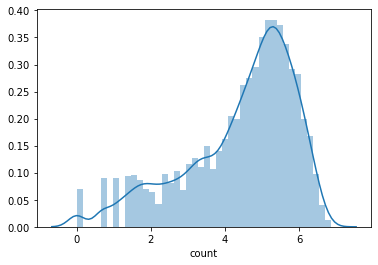

In [ ]:
sn.distplot(np.log(train['count']))

#now the data seems to be less skewed

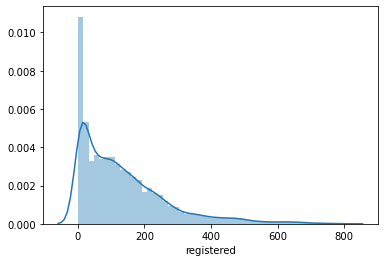

In [ ]:
sn.distplot(train['registered'])

# BIVARIATE ANALYSIS

In [ ]:
corr=train[['temp','atemp','humidity','windspeed','casual','registered','count']].corr()

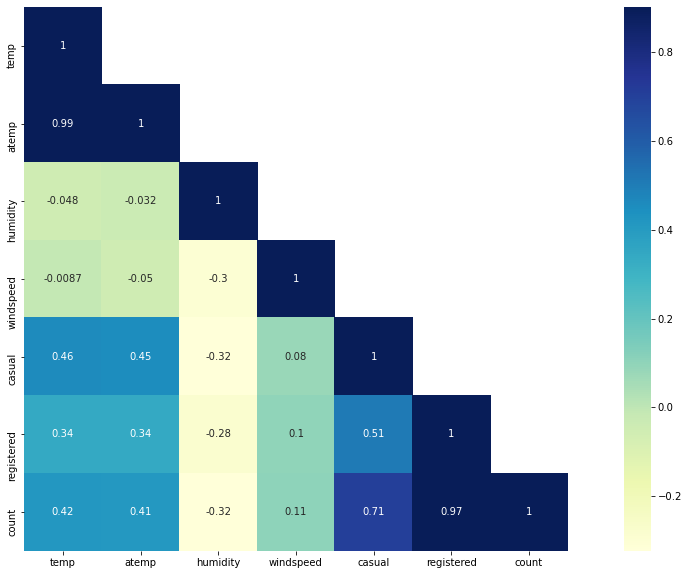

In [ ]:
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr,mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

1. temp has positive correlation with count
2. humidity has negative correlation with count
3. temp and atemp are highly correlate thus need not to consider both for model building
4. windspid has no much correlation with count, so it is also a useless data for model building

Extracting date, time, and hour

In [ ]:
from datetime import datetime
from datetime import date
import calendar

In [ ]:
train["date"] = train.datetime.apply(lambda x : x.split()[0])
train["hour"] = train.datetime.apply(lambda x : x.split()[1].split(":")[0])
train["month"] = train.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [ ]:
test["date"] = test.datetime.apply(lambda x : x.split()[0])
test["hour"] = test.datetime.apply(lambda x : x.split()[1].split(":")[0])
test["month"] = test.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

Creating training and validation set to check the performance of model

In [ ]:
training = train[train['datetime']<='2012-05-30 0:00:00']
validation = train[train['datetime']>'2012-05-30 0:00:00']

dropping datetime, date, atemp and windspeed

In [ ]:
train = train.drop(['datetime','date', 'atemp','windspeed'],axis=1)
test = test.drop(['datetime','date', 'atemp','windspeed'], axis=1)
training = training.drop(['datetime','date', 'atemp','windspeed'],axis=1)
validation = validation.drop(['datetime','date', 'atemp','windspeed'],axis=1)

# LINEAR REGRESSION MODEL

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lreg=LinearRegression()

In [ ]:
train_x = training.drop('count', 1)
train_y = np.log(training['count'])
val_x = validation.drop('count', 1)
val_y = np.log(validation['count'])

In [ ]:
train_x.shape

(12236, 10)

In [ ]:
train_y.shape

(12236,)

In [ ]:
val_x.shape

(744, 10)

In [ ]:
val_y.shape

(744,)

In [ ]:
lreg.fit(train_x,train_y)

LinearRegression()

In [ ]:
lreg.score(train_x,train_y)

0.730357312030308

In [ ]:
pred=lreg.predict(val_x)

In [ ]:
def rms(y1, y2):
    y1 = np.exp(y1),   # taking the exponential as we took the log of target variable
    y2 = np.exp(y2)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y1]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y2]))
    sqr = (log1 - log2) ** 2
    return np.sqrt(np.mean(sqr))

In [ ]:
rms(val_y,pred)
# rmse value is 0.8456

0.845557812951983

In [ ]:
test_predictions=lreg.predict(test)
test_predictions=pd.DataFrame(test_predictions)
test_predictions.to_csv('E:/Data science/Statistics/prediction_test.csv')

# DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt = DecisionTreeRegressor(max_depth=10)

In [ ]:
dt.fit(train_x,train_y)

DecisionTreeRegressor(max_depth=10)

In [ ]:
predict = dt.predict(val_x)

In [ ]:
rms(val_y, predict)

0.026245542807696916

rms value is quite small hend it's a better prediction

In [ ]:
test_predictiondt = dt.predict(test)

These are the log values and we have to convert them back to the original scale.

In [ ]:
final_prediction = np.exp(test_predictiondt)

Saving the final predictions into csv file

In [ ]:
submission = pd.DataFrame()

In [ ]:
submission['count'] = final_prediction

In [ ]:
submission.to_csv('E:/Data science/Statistics/Assignment 4 (3)/submission.csv', header=True, index=False)